<a href="https://colab.research.google.com/github/NarayaniSuresh/CSE340/blob/main/Lab_8_Implementation_of_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries and Load the Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Step 2: Exploratory Data Analysis and Rename Column Names
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv("Cars-RF.csv", names=column_names)



In [3]:
# Step 3: View Summary of Dataset
print("Summary of Dataset:")
print(car_data.info())



Summary of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [4]:
# Step 4: Check Frequency Counts of Categorical Variables and 'Class' Variable
print("\nFrequency Counts of Categorical Variables:")
for column in car_data.columns:
    if car_data[column].dtype == 'object':
        print(car_data[column].value_counts())




Frequency Counts of Categorical Variables:
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [5]:
# Step 5: Check for Null Values
print("\nMissing Values:")
print(car_data.isnull().sum())




Missing Values:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [6]:
# Step 6: Split Data into Training and Test Sets
X = car_data.drop('class', axis=1)
y = car_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Step 7: Check Shape and Data Types of Training and Test Sets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Data Types of Variables:")
print(X_train.dtypes)




Shape of X_train: (1382, 6)
Shape of X_test: (346, 6)
Data Types of Variables:
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object


In [8]:
# Step 8: Encode Categorical Variables using Ordinal Encoding
ordinal_mapping = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3,
                   'small': 0, 'med': 1, 'big': 2,
                   '2': 2, '3': 3, '4': 4, '5more': 5,
                   '2': 2, '4': 4, 'more': 5}

X_train_encoded = X_train.applymap(lambda x: ordinal_mapping.get(x, x))
X_test_encoded = X_test.applymap(lambda x: ordinal_mapping.get(x, x))


In [9]:

# Step 9: Check Random Forest Classifier Model with Default Parameters
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_encoded, y_train)
print("\nRandom Forest Classifier Model with Default Parameters:")
print("Training Accuracy:", rf_default.score(X_train_encoded, y_train))
print("Testing Accuracy:", rf_default.score(X_test_encoded, y_test))



Random Forest Classifier Model with Default Parameters:
Training Accuracy: 1.0
Testing Accuracy: 0.9624277456647399


In [10]:

# Step 10: Check Random Forest Classifier Model with Different Number of Trees
rf_100_trees = RandomForestClassifier(n_estimators=100, random_state=42)
rf_100_trees.fit(X_train_encoded, y_train)
print("\nRandom Forest Classifier Model with 100 Trees:")
print("Training Accuracy:", rf_100_trees.score(X_train_encoded, y_train))
print("Testing Accuracy:", rf_100_trees.score(X_test_encoded, y_test))




Random Forest Classifier Model with 100 Trees:
Training Accuracy: 1.0
Testing Accuracy: 0.9624277456647399


In [11]:
# Step 11: Find Important Features with the Random Forest Model
feature_importances = pd.DataFrame(rf_default.feature_importances_,
                                   index=X_train_encoded.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importance Scores:")
print(feature_importances)




Feature Importance Scores:
          importance
safety      0.306203
persons     0.235888
maint       0.155236
buying      0.151359
lug_boot    0.086601
doors       0.064714


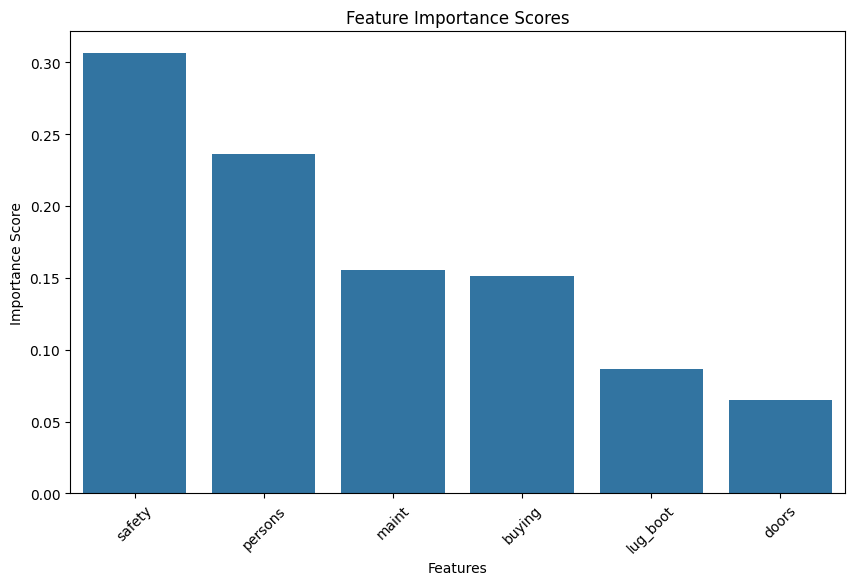

In [12]:
# Step 12: Visualize Feature Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.title('Feature Importance Scores')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()


In [13]:

# Step 13: Build Random Forest Model on Selected Features
selected_features = feature_importances[feature_importances['importance'] > 0.05].index
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)



RandomForestClassifier(random_state=42)

In [14]:
# Step 14: Print Confusion Matrix
y_pred = rf_selected.predict(X_test_selected)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[ 76   5   1   1]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   1   0  15]]


In [15]:

# Step 15: Display Precision, Recall, F1, and Support Scores using Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

         acc       0.99      0.92      0.95        83
        good       0.65      1.00      0.79        11
       unacc       1.00      1.00      1.00       235
       vgood       0.94      0.88      0.91        17

    accuracy                           0.97       346
   macro avg       0.89      0.95      0.91       346
weighted avg       0.98      0.97      0.98       346

